 # Two photon DCE
## Simealtaneously observing wave and particle nature of two entangled photons in two different interferometers.
Two entangled photons are produced and are sent to two different interferometers(q[0] and q[1]). The initial state is given by 
_|00>+|11>_/$\sqrt{2}$. Two U1 gates are the phase shifters providing the phase $\phi$. The top interferometer is always closed and the bottom interferometer, if open or close, is decided by ancilla which has a U3 gate. To simealtaneously observe the wave and particle nature, we produce ancilla state(using U3) as $$\psi_1=sin\alpha|1> + cos\alpha|0>$$ so the resultant state comes out to be
$$\Psi=sin\alpha|w>|1> + cos\alpha|p>|0>$$. where $$ |w>=\frac{1}{\sqrt{2}}e^{\iota\frac{\phi}{2}}(cos\frac{\phi}{2}|00>- \iota sin\frac{\phi}{2}|01> + \iota sin\frac{\phi}{2}|10> + cos\frac{\phi}{2}|11>$$ ) and $$|p> = \frac{1}{2}( |00> + |01> + e^{\iota\phi}|10> + e^{\iota\phi}|11>$$. So depending upon $\alpha$ and $\phi$ it can behave as a wave or a particle or both. So by varying the ancilla paramater $\alpha$ we study the smooth transition between the wave-like and particle-like nature of two entangled photons.

In [49]:
# Two photon DCE
import numpy
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ, Aer
from math import pi
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
provider = IBMQ.load_account()


Credentials are already in use. The existing account in the session will be replaced.


In [43]:
# Create a Quantum Circuit acting on the q register
## This Experiment is used to observe the simealtaneous wave and particle nature of the two entangledd photons
alpha = [0,pi/8, pi/4, 3*pi/8, pi/2]
phi = np.arange(0,21*pi /10,pi/10)
#alpha1, phi1 =np.meshgrid(alpha,phi)
phi1, alpha1 = np.meshgrid(phi, alpha)
X = alpha1
Y = phi1

count_list1=[]
count_list=[]

for y in alpha:
    for x in np.arange(0,21*pi/10,pi/10):
        c = ClassicalRegister (2, 'c')
        q = QuantumRegister(3, 'q')
        qc = QuantumCircuit(q,c)
        qc.h(q[0])
        qc.u3(2*y,0,0,q[2])
        qc.cx(q[0],q[1]) 
        qc.u1(x,q[0])
        qc.u1(x,q[1])    
        qc.ch(q[2],q[1])
        qc.h(q[0])
        
        qc.measure(q[0], c[0])
        qc.measure(q[1], c[1])
        #backend = provider.get_backend('ibmq_qasm_simulator')
        backend = Aer.get_backend('qasm_simulator')
        shots=8192
        # Compile and run the Quantum Program on a real device backend
        job_exp = execute(qc, backend=backend, shots=8192)
        result = job_exp.result()
        #print(result.get_counts(qc))
        counts=result.get_counts(qc)
        if '00' in list(counts):
            count_list1.append(counts['00']/shots)   
        else:
            count_list1.append(0)
            
    count_list.append(count_list1)
    count_list1=[]
   
    

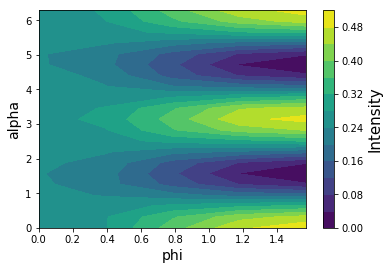

In [45]:
# import matplotlib.pyplot as plt
plt.contourf(X, Y, count_list, 14)
#plt.contourf(X, Y, Fidelity_list2, 15)

cbar=plt.colorbar()
cbar.set_label('Intensity', size=15)
plt.xlabel("phi", color="black",size=14)
plt.ylabel("alpha", color='black',size=14)
#plt.savefig('DCE.png', dpi=600)
plt.show()
qc.draw()